# シンプルなLSTMの実装

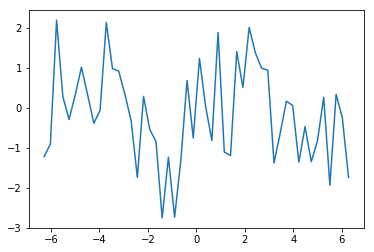

X (40, 10, 1) T (40, 1)


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

PI = np.pi
x_data = np.linspace(-2*PI, 2*PI)
sin_data = np.sin(x_data) + np.random.randn(len(x_data))

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10
n_sample = len(x_data) - n_rnn
x = np.zeros((n_sample, n_rnn))
t = np.zeros((n_sample, ))
for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn]
    t[i] = sin_data[i+n_rnn]

x = x.reshape(n_sample, n_rnn, 1)
t = t.reshape(n_sample, 1)
print('X', x.shape, 'T', t.shape)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM

batch_size = 8
n_in = 1
n_hidden = 20
n_out = 1

model_rnn = Sequential()
model_rnn.add(SimpleRNN(n_hidden, input_shape=(n_rnn, n_in), return_sequences=False))
model_rnn.add(Dense(n_out, activation='linear'))
model_rnn.compile(loss='mean_squared_error', optimizer='sgd')
print(model_rnn.summary())

model_lstm = Sequential()
model_lstm.add(LSTM(n_hidden, input_shape=(n_rnn, n_in), return_sequences=False))
model_lstm.add(Dense(n_out, activation='linear'))
model_lstm.compile(loss='mean_squared_error', optimizer='sgd')
print(model_lstm.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
import time

epochs = 200

start = time.time()
history_rnn = model_rnn.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print('[Simple RNN] took time:', time.time()-start)


start = time.time()
history_lstm = model_lstm.fit(x, t, epochs=epochs, batch_size=batch_size, verbose=0)
print('[Simple LSTM] took time:', time.time()-start)


Instructions for updating:
Use tf.cast instead.
[Simple RNN] took time: 3.6181507110595703
[Simple LSTM] took time: 11.360135078430176
